In [ ]:
#1. Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
##2. Load the Dataset
data = pd.read_csv('customer_segmentation_data.csv')

In [3]:
#View the first few rows of the dataset
print(data.head())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [4]:
#Check for missing values
print(data.isnull().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [5]:
#Get a summary of the dataset
print(data.describe())

                id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500

In [6]:
#Check the data types of each column
print(data.dtypes)

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object


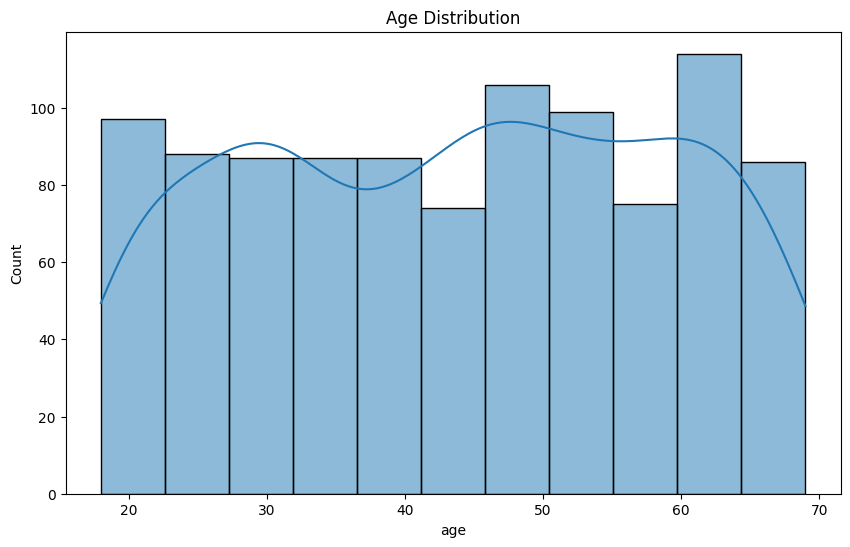

In [7]:
#Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

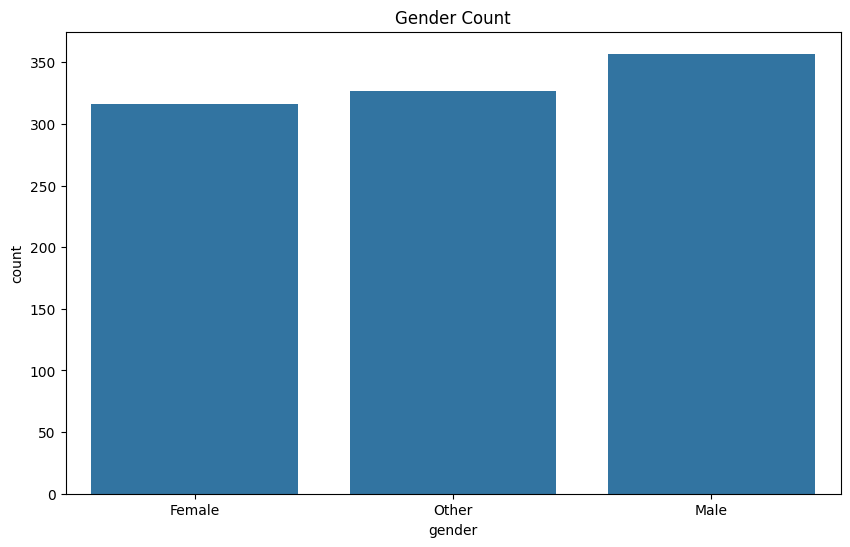

In [8]:
#Gender Count
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=data)
plt.title('Gender Count')
plt.show()

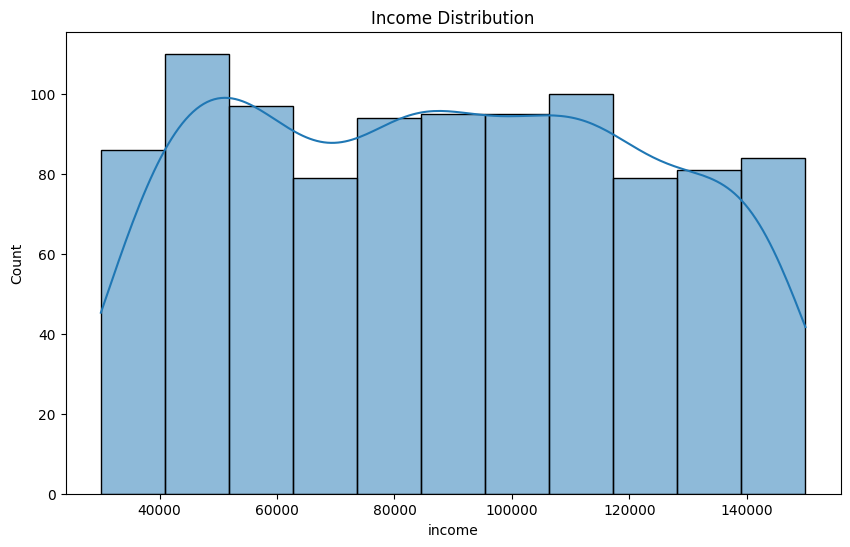

In [9]:
#Income Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['income'], kde=True)
plt.title('Income Distribution')
plt.show()


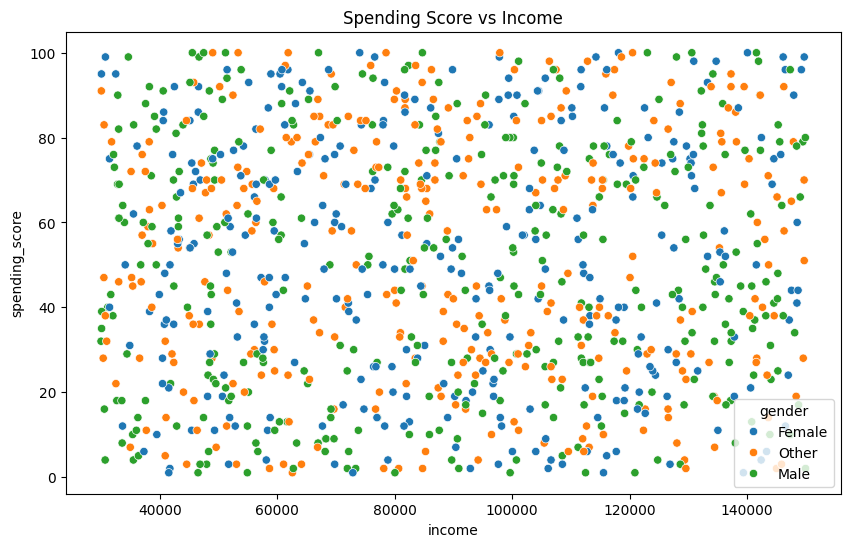

In [10]:
#Spending Score vs Income
plt.figure(figsize=(10,6))
sns.scatterplot(x='income', y='spending_score', data=data, hue='gender')
plt.title('Spending Score vs Income')
plt.show()

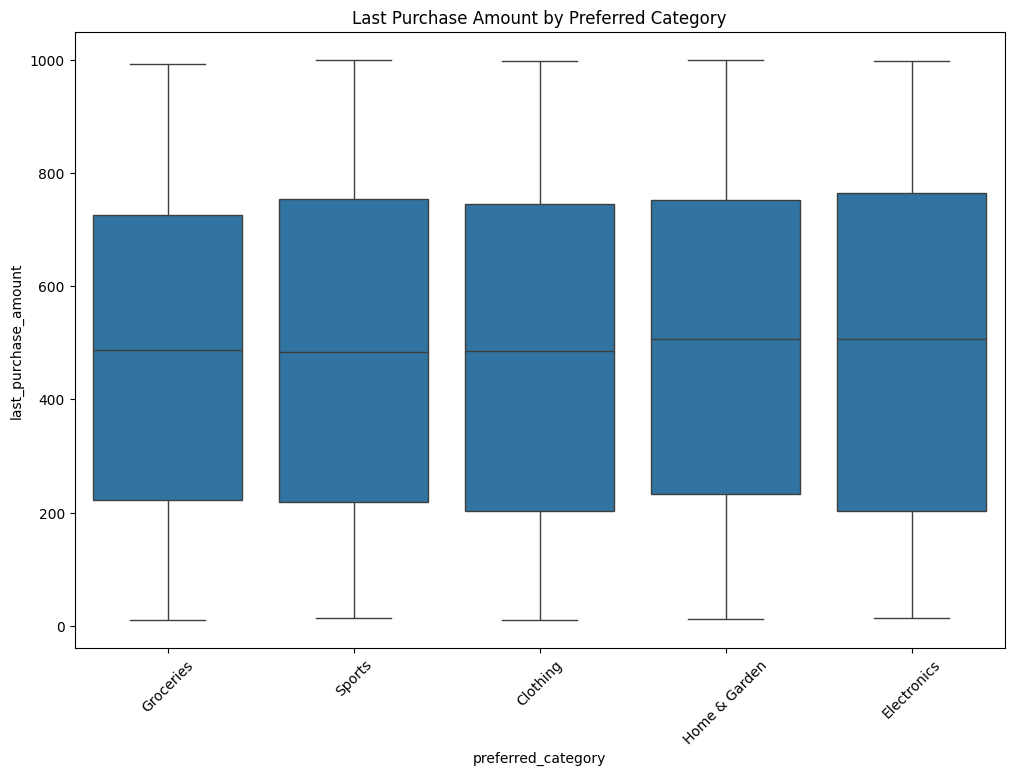

In [11]:
#Boxplot of Last Purchase Amount by Preferred Category
plt.figure(figsize=(12,8))
sns.boxplot(x='preferred_category', y='last_purchase_amount', data=data)
plt.title('Last Purchase Amount by Preferred Category')
plt.xticks(rotation=45)
plt.show()

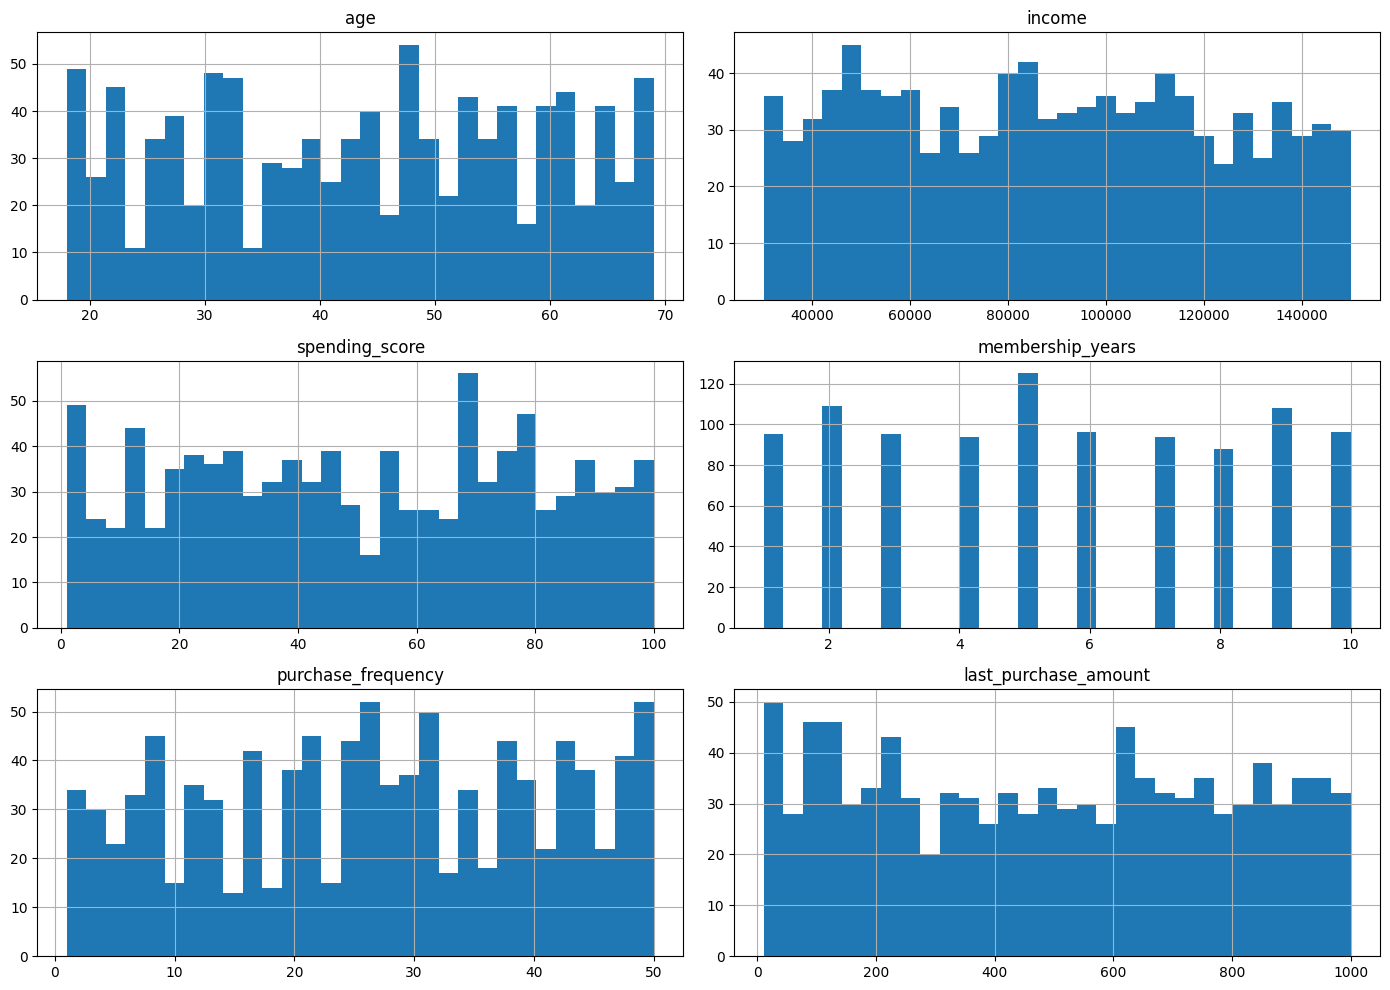

In [13]:
# Plot histograms
data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

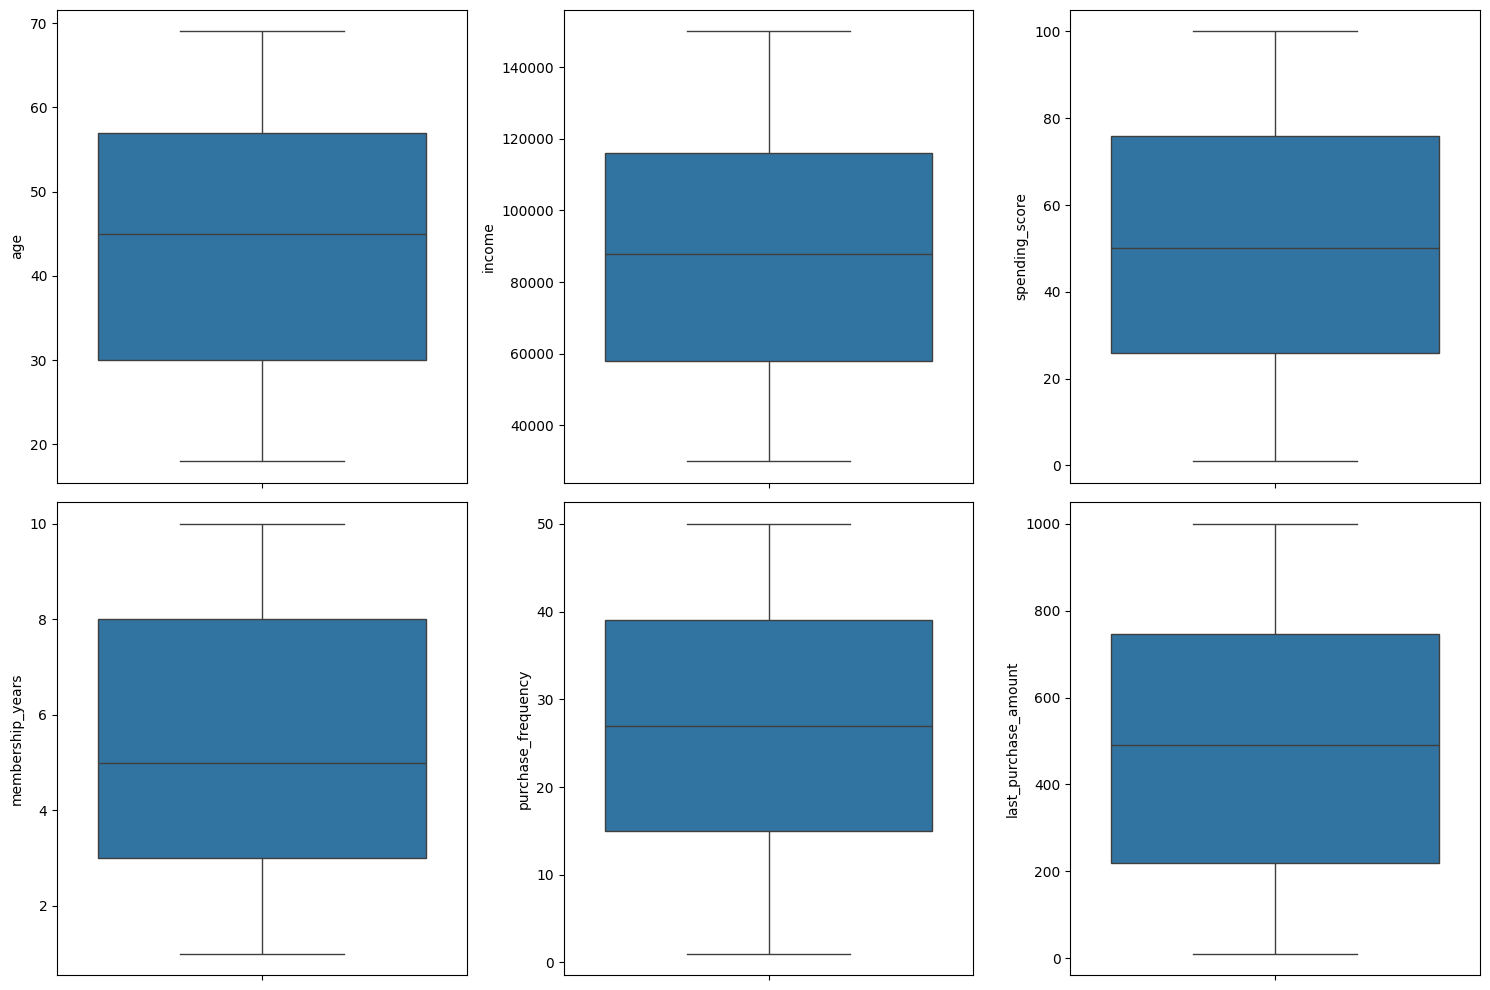

In [15]:
# Plot box plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(y=data['age'], ax=axs[0, 0])
sns.boxplot(y=data['income'], ax=axs[0, 1])
sns.boxplot(y=data['spending_score'], ax=axs[0, 2])
sns.boxplot(y=data['membership_years'], ax=axs[1, 0])
sns.boxplot(y=data['purchase_frequency'], ax=axs[1, 1])
sns.boxplot(y=data['last_purchase_amount'], ax=axs[1, 2])
plt.tight_layout()
plt.show()

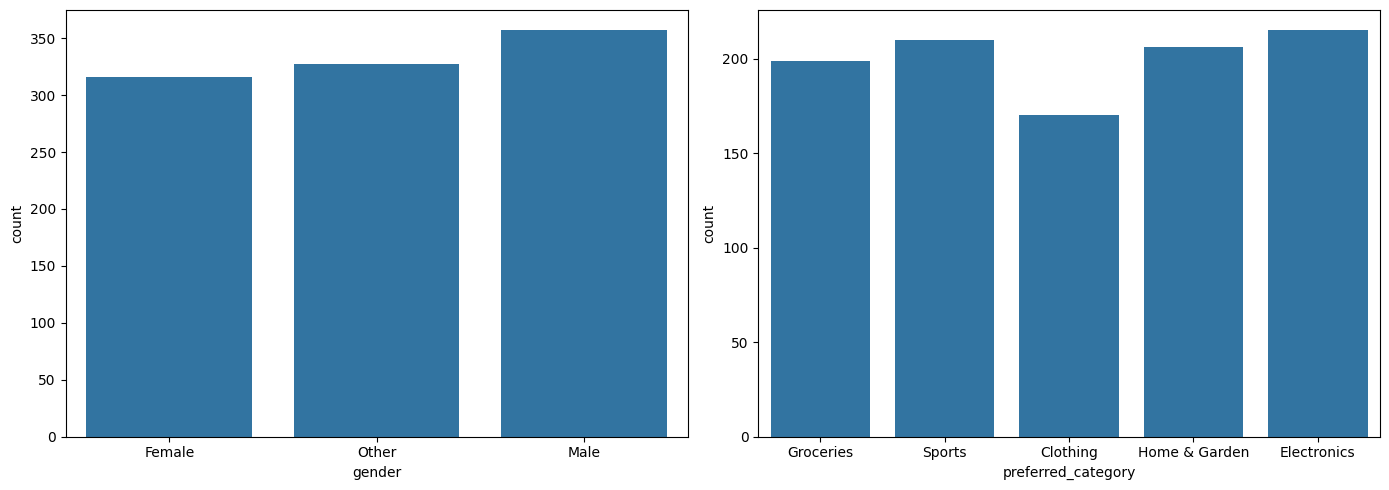

In [16]:
# Plot bar plots for categorical columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=data, x='gender', ax=axs[0])
sns.countplot(data=data, x='preferred_category', ax=axs[1])
plt.tight_layout()
plt.show()

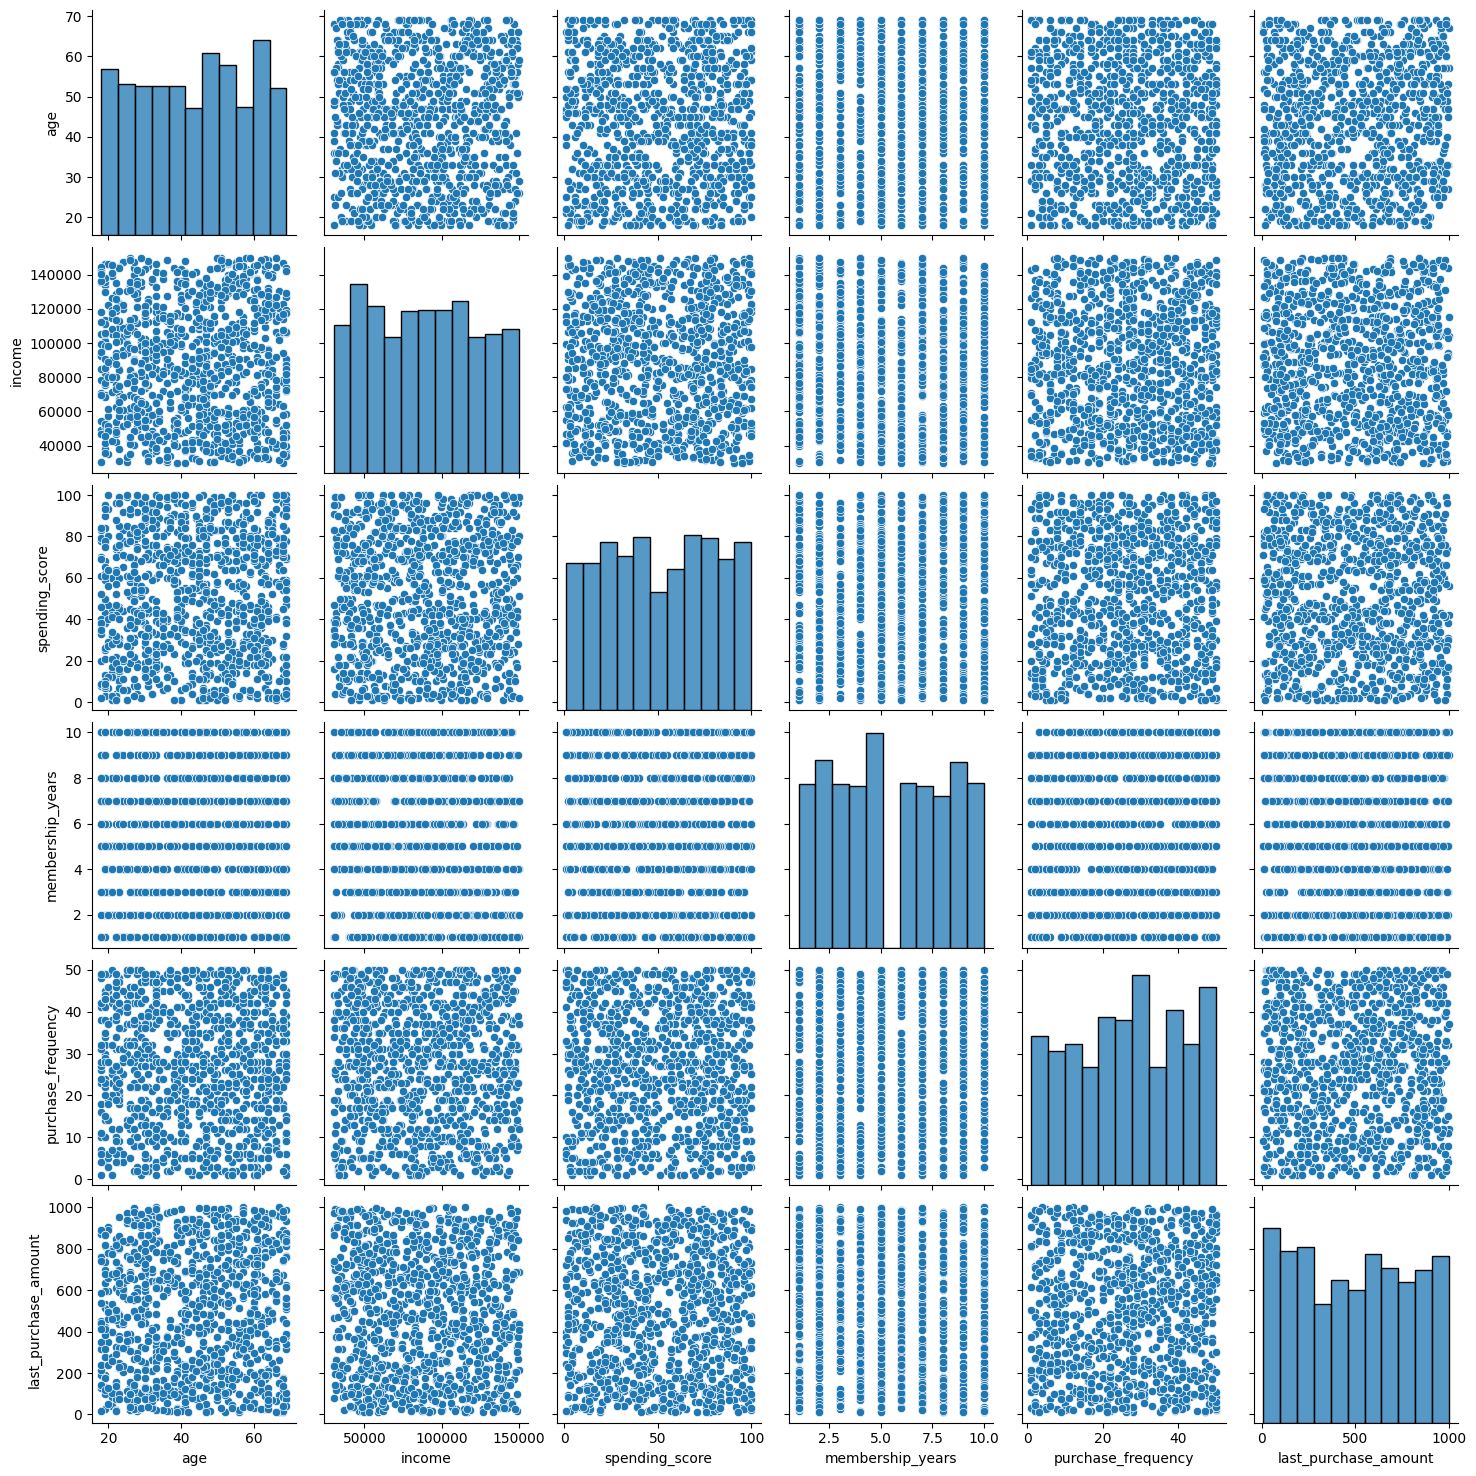

In [18]:
# Scatter plots
sns.pairplot(data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']])
plt.show()

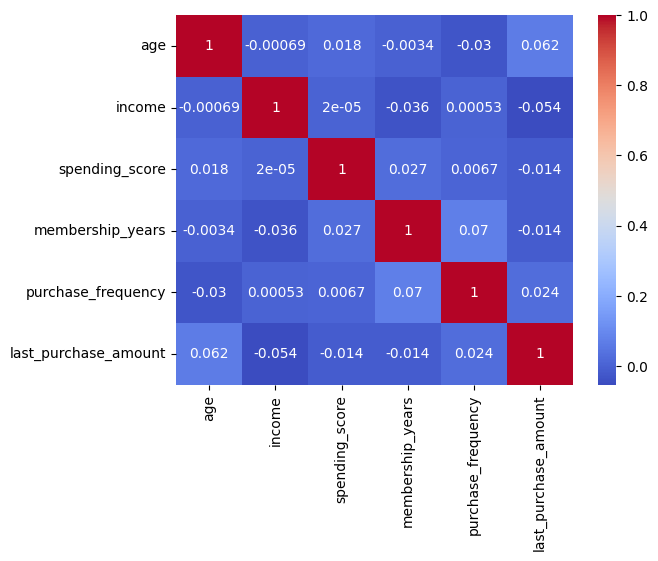

In [20]:
# Correlation matrix
correlation_matrix = data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

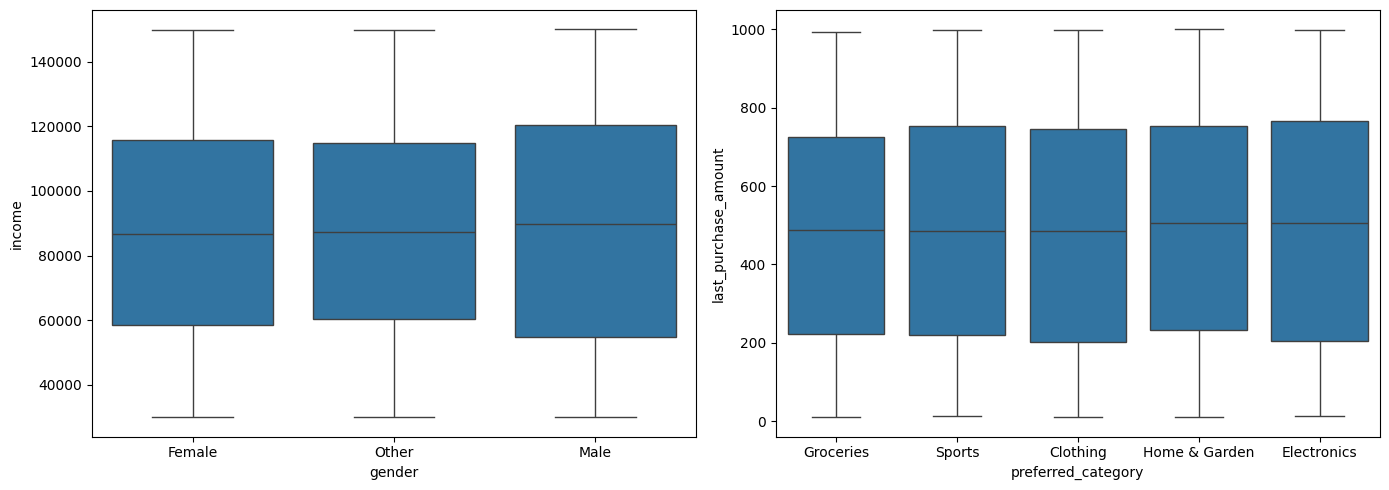

In [21]:
# Box plots for numerical vs categorical
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=data, x='gender', y='income', ax=axs[0])
sns.boxplot(data=data, x='preferred_category', y='last_purchase_amount', ax=axs[1])
plt.tight_layout()
plt.show()

In [9]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']])

In [10]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [15]:
# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['preferred_category'] = data['preferred_category']

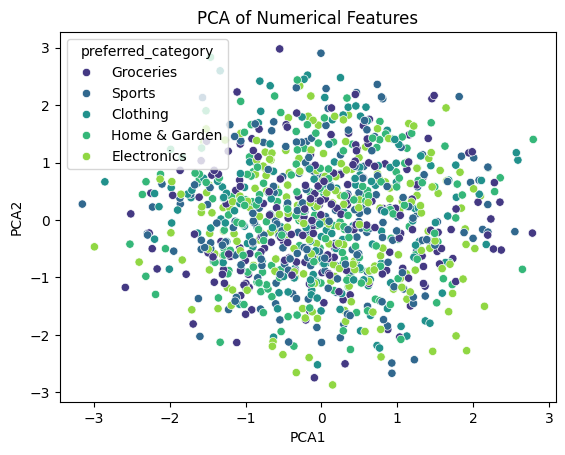

In [16]:
# Plot PCA
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='preferred_category', palette='viridis')
plt.title('PCA of Numerical Features')
plt.show()